<a href="https://colab.research.google.com/github/GPINTOC/Promedio-de-edades-primer-matrimonio/blob/main/4_visualizacion_datos_matrimonio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
filename = '/content/drive/MyDrive/Documentos CodingDojo/Median Age at First Marriage .csv'
df = pd.read_csv(filename)
df.head()

,FIPS,Name,Type,TimeFrame,Median Age,Population Density per Sq Mi
0,1,Alabama,State,2006-2010,25.5,94.4
1,2,Alaska,State,2006-2010,24.8,1.2
2,4,Arizona,State,2006-2010,25.6,56.3
3,5,Arkansas,State,2006-2010,24.5,56.0
4,6,California,State,2006-2010,26.9,239.1


Edad media de los primeros matrimonios

In [4]:
# Columnas y filas
df.shape

(104, 6)

In [5]:
# No hay valores nulos en el df
df.isna().sum()

FIPS                            0
Name                            0
Type                            0
TimeFrame                       0
Median Age                      0
Population Density per Sq Mi    0
dtype: int64

In [6]:
df1 = df.rename(columns={'Median Age': 'Median_Age', 'Population Density per Sq Mi': 'Population_Density'})
df1.columns

Index(['FIPS', 'Name', 'Type', 'TimeFrame', 'Median_Age',
       'Population_Density'],
      dtype='object')

In [7]:
# Los valores corresponden con el tipo descrito
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FIPS                104 non-null    object 
 1   Name                104 non-null    object 
 2   Type                104 non-null    object 
 3   TimeFrame           104 non-null    object 
 4   Median_Age          104 non-null    float64
 5   Population_Density  104 non-null    float64
dtypes: float64(2), object(4)
memory usage: 5.0+ KB


In [8]:
df1.nunique()

FIPS                   52
Name                   52
Type                    2
TimeFrame               2
Median_Age             49
Population_Density    103
dtype: int64

In [9]:
df1.value_counts()

FIPS  Name           Type     TimeFrame  Median_Age  Population_Density
1     Alabama        State    2006-2010  25.5        94.4                  1
                              2015-2019  26.7        99.2                  1
47    Tennessee      State    2006-2010  25.4        153.9                 1
46    South Dakota   State    2015-2019  26.4        11.7                  1
                              2006-2010  25.5        10.7                  1
                                                                          ..
24    Maryland       State    2015-2019  29.1        636.0                 1
                              2006-2010  27.4        594.8                 1
23    Maine          State    2015-2019  27.8        44.2                  1
                              2006-2010  26.5        43.1                  1
US    United States  Country  2015-2019  28.0        94.8                  1
Length: 104, dtype: int64

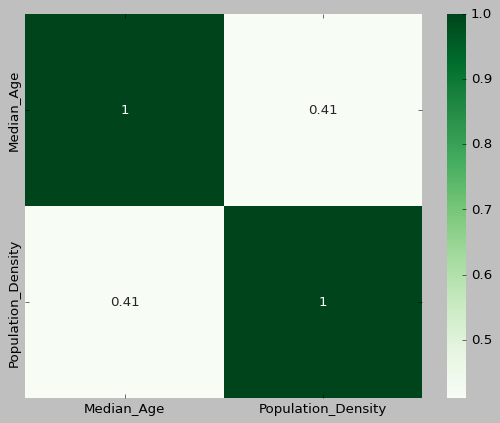

In [72]:
#MAPA DE CALOR 
corr = df1.corr()
corr

sns.heatmap(corr, cmap = 'Greens', annot = True);

Para este data set, se demuestra que no hay correlación ente la densidad de la población y la edad media de matrimonio. 

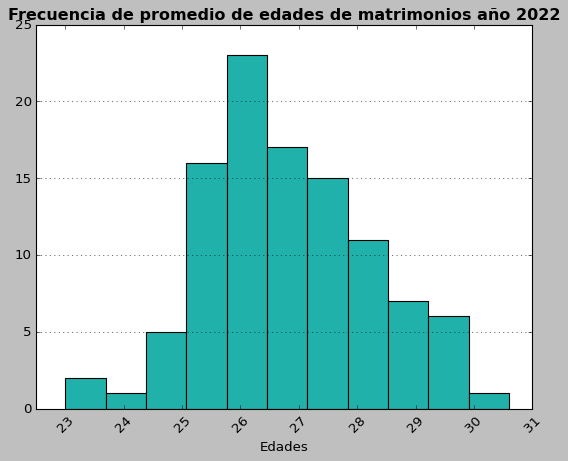

In [162]:
# HISTOGRAMA
plt.style.use('seaborn-v0_8-pastel')
df1['Median_Age'].hist(color='lightseagreen', bins = 11)
plt.xticks(rotation = 45)
plt.xlim(22.5, 31)
plt.xlabel('Edades')
plt.title('Frecuencia de promedio de edades de matrimonios año 2022', fontweight = 'bold')
plt.grid(axis = 'x')

En este caso, el histograma muestra que la frecuencia que más se repite en las edades medias de matrimonios para el año 2022 es en torno a los 26 años.Posterior a eso, las frecuencias para edades más altas van disminuyendo.

In [104]:
promedio_name = df1.groupby('Name')['Median_Age', 'Population_Density'].mean()

<ipython-input-104-977cca0a89f2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  promedio_name = df1.groupby('Name')['Median_Age', 'Population_Density'].mean()


In [109]:
promedio_name['Median_Age'].values

array([26.1 , 25.6 , 26.7 , 25.1 , 27.95, 26.7 , 28.55, 27.7 , 30.1 ,
       27.75, 26.8 , 27.7 , 24.35, 28.  , 26.45, 26.05, 25.6 , 25.7 ,
       27.05, 27.15, 28.25, 29.2 , 27.35, 27.05, 26.4 , 26.35, 25.9 ,
       25.95, 26.75, 27.75, 28.55, 26.8 , 29.  , 26.75, 25.85, 27.1 ,
       25.2 , 27.  , 27.95, 28.8 , 27.2 , 25.95, 26.15, 26.15, 27.15,
       23.8 , 27.7 , 27.15, 26.55, 26.05, 27.1 , 24.95])

(0.0, 1400.0)

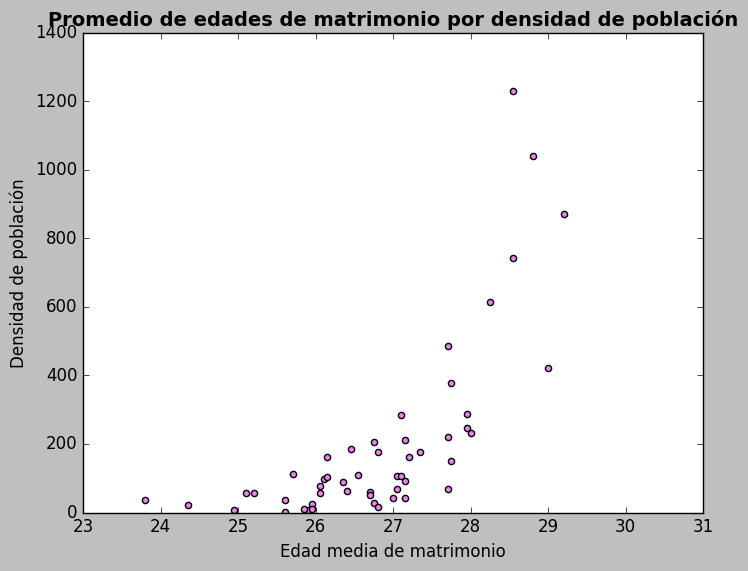

In [163]:
# SCATTER
fig = plt.figure (dpi = 100)
plt.title('Promedio de edades de matrimonio por densidad de población', fontsize = 14, fontweight = 'bold')
plt.style.use('classic')
plt.scatter(promedio_name['Median_Age'].values, promedio_name['Population_Density'].values, c = 'violet')
plt.xlabel('Edad media de matrimonio')
plt.ylabel('Densidad de población')
plt.ylim(0, 1400)

En este gráfico scatter se puede apreciar que para la densidad de la población por milla cuadrada menor, la edad media de matrimonio se concentra en los 26 a 27 años, mientras que para las poblaciones con densidades mayores la edad va aumentando, sin embargo, hay poca data para las poblaciones con mayor densidad por lo que no es posible sacar conclusiones.

In [147]:
timeframe_2006_2010 = df1[df1['TimeFrame'] == '2006-2010'].sort_values('Median_Age', ascending = True).reset_index(drop=True)
timeframe_2006_2010

,FIPS,Name,Type,TimeFrame,Median_Age,Population_Density
0,49,Utah,State,2006-2010,23.0,33.6
1,16,Idaho,State,2006-2010,23.3,19.0
2,56,Wyoming,State,2006-2010,24.2,5.8
3,5,Arkansas,State,2006-2010,24.5,56.0
4,40,Oklahoma,State,2006-2010,24.5,54.7
5,2,Alaska,State,2006-2010,24.8,1.2
6,21,Kentucky,State,2006-2010,25.0,109.9
7,20,Kansas,State,2006-2010,25.1,34.9
8,48,Texas,State,2006-2010,25.3,96.3
9,54,West Virginia,State,2006-2010,25.4,77.1


In [149]:
timeframe_2015_2019 = df1[df1['TimeFrame'] == '2015-2019'].sort_values('Median_Age', ascending = True).reset_index(drop=True)
timeframe_2015_2019

,FIPS,Name,Type,TimeFrame,Median_Age,Population_Density
0,49,Utah,State,2015-2019,24.6,39.8
1,16,Idaho,State,2015-2019,25.4,22.3
2,56,Wyoming,State,2015-2019,25.7,5.9
3,5,Arkansas,State,2015-2019,25.7,57.9
4,40,Oklahoma,State,2015-2019,25.9,57.7
5,38,North Dakota,State,2015-2019,26.0,11.3
6,20,Kansas,State,2015-2019,26.1,35.9
7,31,Nebraska,State,2015-2019,26.4,25.5
8,30,Montana,State,2015-2019,26.4,7.5
9,2,Alaska,State,2015-2019,26.4,1.3


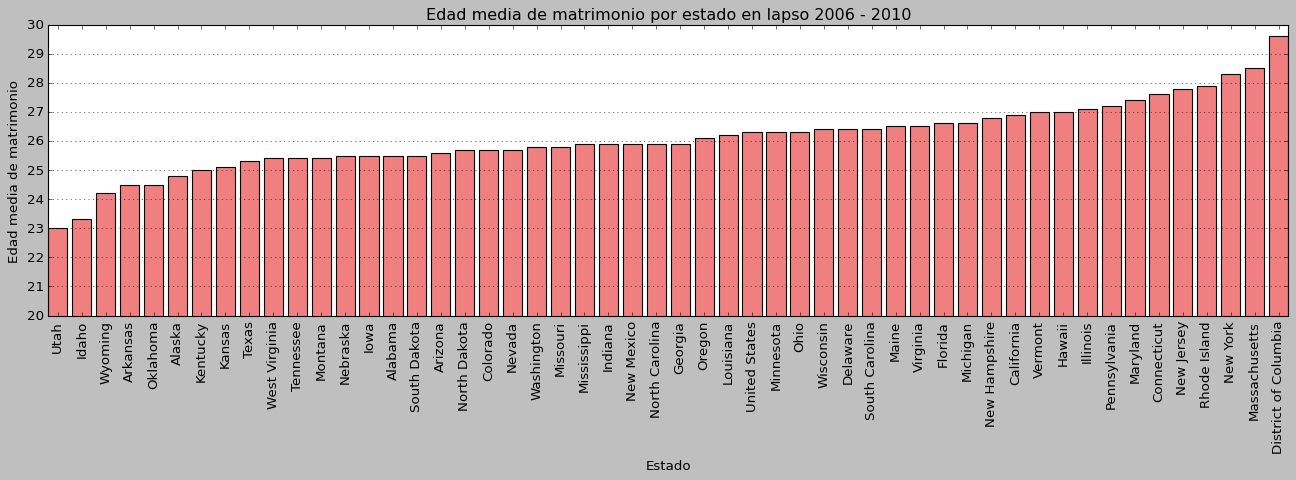

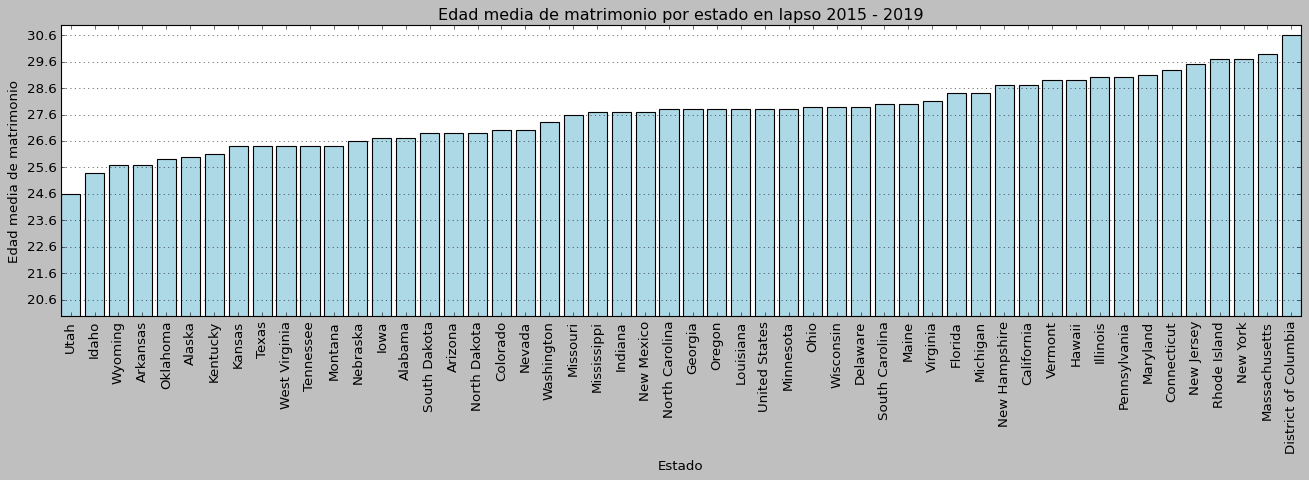

In [161]:
# SUBPLOT GRÁFICO DE BARRA
# SUBPLOT 1
# EDAD MEDIA MATRIMONIO 2006-2010
x = timeframe_2006_2010['Name']
y = timeframe_2006_2010['Median_Age']
fig1= plt.figure(figsize =(20,10))
ax1 = fig1.add_subplot(2, 1, 1)
plt.bar(x, y, color = 'lightcoral')
plt.xticks( rotation = 90)
plt.yticks(np.arange(y.min() -3, y.max() + 1, 1.0))
plt.xlabel('Estado')
plt.ylabel('Edad media de matrimonio')
plt.title('Promedio de edad de primer matrimonio por estado en lapso 2006 - 2010')
plt.ylim(20, 30)
plt.grid(axis = 'y')
plt.show()

# EDAD MEDIA MATRIMONIO 2015-2019
# SUBPLOT 2
x2 = timeframe_2006_2010['Name']
y2 = timeframe_2015_2019['Median_Age']
fig2= plt.figure(figsize =(20,10))
ax2 = fig2.add_subplot(2, 1, 2)
plt.bar(x2, y2, color = 'lightblue')
plt.xticks(rotation = 90)
plt.yticks(np.arange(y2.min() -4, y2.max() + 1, 1.0))
plt.xlabel('Estado')
plt.ylabel('Edad media de matrimonio')
plt.title('EPromedio de edad de primer matrimonio por estado en lapso 2015 - 2019')
plt.ylim(20, 31)
plt.grid(axis = 'y')
plt.show()


En este subplot se puede visualizar que el rango de tiempo en que se evaluaron las edades medias de las personas que contrajeron matrimonio ha cambiado.

- La distribución en cuanto a edades por estado es igual para ambos periodos.

- Hay un cambio en la edad media de matrimonio. En el periodo 2015 - 2019, la edad media para contraer matrimonio aumento en al menos 1 año respecto al periodo 2006 - 2010

